# Preparing Dataset

In [9]:
# importing libraries
import pandas                  as pd # data science essentials
import matplotlib.pyplot       as plt # essential graphical output
import seaborn                 as sns # enhanced graphical output
import statsmodels.formula.api as smf # predictive modeling with nice outputs
import numpy                   as np  # mathematical essentials
from sklearn.model_selection   import train_test_split # split test set
from sklearn.linear_model      import LinearRegression 
import sklearn.linear_model                               # linear models
from sklearn.neighbors         import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing     import StandardScaler      # standard scaler


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './birthweight_low.xlsx'


# reading the file into Python
birth = pd.read_excel(io = file,
                       header = 0)


# outputting the first ten rows of the dataset
birth.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [10]:
# using .shape to check the number of ROWS and COLUMNS
print(f"""
Data shape: {birth.shape}

{'*'*40}
""")

# checking information about each variable
print(f"""
{birth.info()}
""")


Data shape: (196, 18)

****************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB

None



In [11]:
# copy original data 
df = pd.DataFrame(birth).copy()

# check the result
print(birth.head(n=5))

   mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  male  mwhte  mblck  moth  fwhte  fblck  foth  bwght
0    69    NaN       5    2.0    62    NaN      4      7    23      9     1      0      1     0      0      1     0    697
1    68   12.0       3   10.0    61   11.0      4      6    25     11     1      1      0     0      1      0     0   1290
2    71   12.0       3    6.0    46   12.0      2      7    21     12     1      0      1     0      0      1     0   1490
3    59   16.0       1    8.0    48   16.0      7      8    21     10     0      0      0     1      0      0     1   1720
4    48   12.0       4    6.0    39   12.0      2      9    17     13     0      1      0     0      1      0     0   1956


# Imput missing value 

In [12]:
# ckeck columns to find missing value
print(f"""
Columns including missing data
{df.isnull().any(axis = 0)}

{'*'* 40}
""")

# check the number of missing values
print(f"""
Numbers of missing data
{df.isnull().sum(axis = 0)}
""")


Columns including missing data
mage      False
meduc      True
monpre    False
npvis      True
fage      False
feduc      True
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool

****************************************


Numbers of missing data
mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64



In [13]:
# check all values to find invaluable data
for columns in df:
    print(df[f'{columns}'].value_counts(normalize = False,
                                sort = True, ascending = True))

69     1
68     1
45     1
59     1
67     1
54     1
56     1
57     1
60     1
62     1
70     1
64     2
26     2
52     2
25     2
46     2
23     2
27     2
71     2
58     2
53     2
24     3
61     3
51     4
28     4
50     4
49     4
43     5
44     5
35     5
36     5
47     6
31     6
37     7
39     7
48     7
30     8
32     8
41     8
34     9
40     9
29    10
33    12
38    12
42    14
Name: mage, dtype: int64
8.0      1
10.0     4
15.0     9
11.0    11
13.0    15
17.0    18
14.0    28
16.0    51
12.0    56
Name: meduc, dtype: int64
6     2
7     3
8     3
5     4
4    13
3    33
1    45
2    93
Name: monpre, dtype: int64
2.0      1
35.0     1
19.0     1
25.0     1
31.0     1
18.0     1
17.0     2
30.0     2
3.0      2
20.0     3
5.0      3
16.0     5
7.0      7
6.0      7
14.0     7
15.0     9
13.0     9
9.0     12
8.0     15
11.0    15
10.0    24
12.0    65
Name: npvis, dtype: int64
27     1
68     1
66     1
55     1
59     1
73     1
67     1
50     1
24     1
53   

In [14]:
# checking a information of missing column to decide what will use 

# groupping columns having missing value
mis_col = df.loc[ : , ['meduc','npvis','feduc']]

# loop to check mean, median, and mode
for col in df:
    if col in mis_col:
        print(f"""
Describe 
{df[{col}].describe().round(decimals=2)}
        
 Mode : {df[{col}].mode()}
               
        """)
   


Describe 
        meduc
count  193.00
mean    13.91
std      2.06
min      8.00
25%     12.00
50%     14.00
75%     16.00
max     17.00
        
 Mode :    meduc
0   12.0
               
        

Describe 
        npvis
count  193.00
mean    11.60
std      4.27
min      2.00
25%     10.00
50%     12.00
75%     12.00
max     35.00
        
 Mode :    npvis
0   12.0
               
        

Describe 
        feduc
count  189.00
mean    13.85
std      2.63
min      1.00
25%     12.00
50%     14.00
75%     16.00
max     17.00
        
 Mode :    feduc
0   12.0
               
        


Checking values of the missing columns to decide what is the better way to fill them

In [15]:
# developing a loop to automatically flag missing values
for col in df:

    if df[col].isnull().astype(int).sum() > 0:
        df['m_'+col] = df[col].isnull().astype(int)
        
# ckeck missing value
print(df.isnull().any(axis = 0))

mage       False
meduc       True
monpre     False
npvis       True
fage       False
feduc       True
omaps      False
fmaps      False
cigs       False
drink      False
male       False
mwhte      False
mblck      False
moth       False
fwhte      False
fblck      False
foth       False
bwght      False
m_meduc    False
m_npvis    False
m_feduc    False
dtype: bool


In [16]:
# imputing missing value 
# soft coding MEDIAN for meduc
meduc_median = df['meduc'].median()


# filling meduc NAs with MEDIAN
df['meduc'].fillna(value = meduc_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(df['meduc'].isnull().any())

False


In [17]:
# imputing missing value 
# soft coding MEDIAN for npvis
npvis_median = df['npvis'].median()


# filling npvis NAs with MEDIAN
df['npvis'].fillna(value = npvis_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(df['npvis'].isnull().any())

False


In [18]:
# imputing missing value 
# soft coding MEDIAN for feduc
feduc_median = df['feduc'].median()


# filling feduc NAs with MEDIAN
df['feduc'].fillna(value = feduc_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(df['feduc'].isnull().any())

False


In [19]:
# ckeck missing value
print(df.isnull().any(axis = 0))

mage       False
meduc      False
monpre     False
npvis      False
fage       False
feduc      False
omaps      False
fmaps      False
cigs       False
drink      False
male       False
mwhte      False
mblck      False
moth       False
fwhte      False
fblck      False
foth       False
bwght      False
m_meduc    False
m_npvis    False
m_feduc    False
dtype: bool


In [20]:
# Saving the imputted data and making dataframe for regression
df_im = pd.DataFrame(df).copy()
df = df.iloc[ : , : 18]

#checking missing value
df.isnull().sum(axis = 0)

mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [21]:
# Checking data 
df.describe().round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.61,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.04,1.36,4.23,8.98,2.59,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


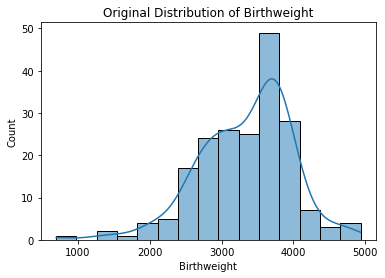

In [22]:
# developing a histogram using HISTPLOT
sns.histplot(data   = df,
          x      = 'bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [23]:
# log transforming bwght and saving it to the dataset
df['log_bwght'] = np.log(df['bwght'])

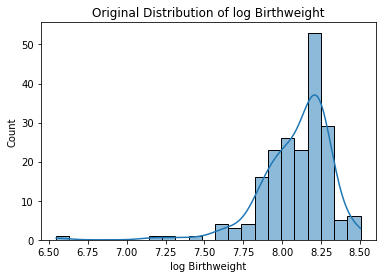

In [24]:
# developing a histogram using HISTPLOT
sns.histplot(data   = df,
          x      = 'log_bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of log Birthweight")
plt.xlabel(xlabel = "log Birthweight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

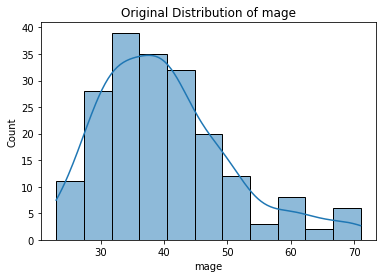

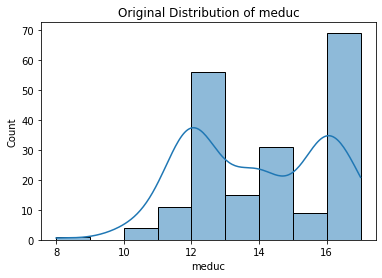

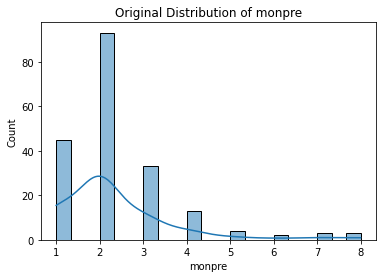

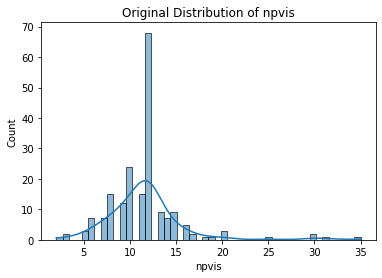

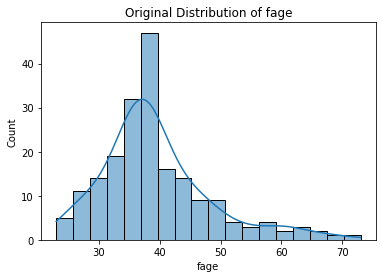

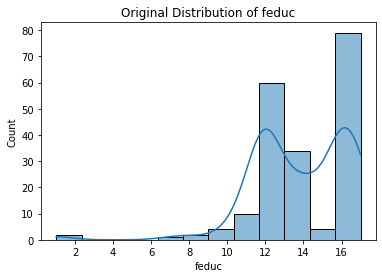

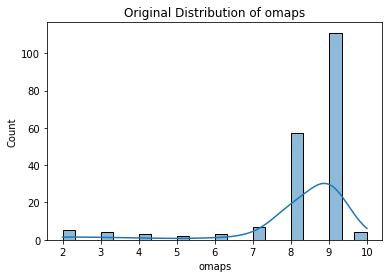

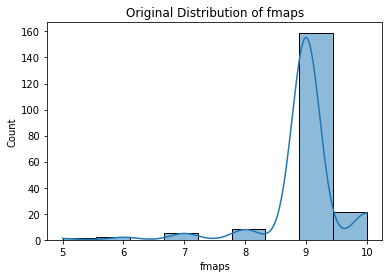

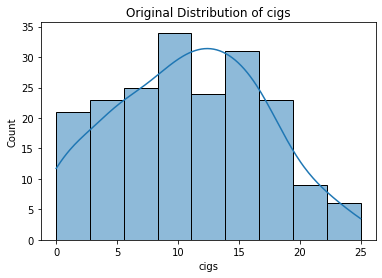

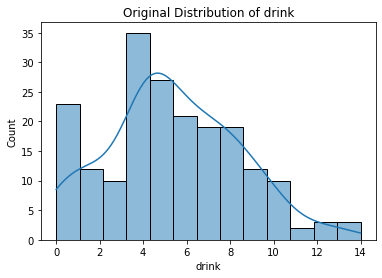

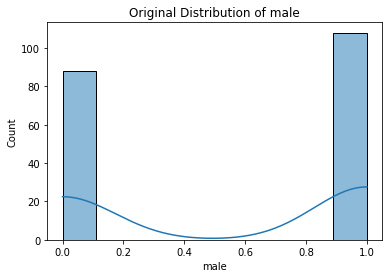

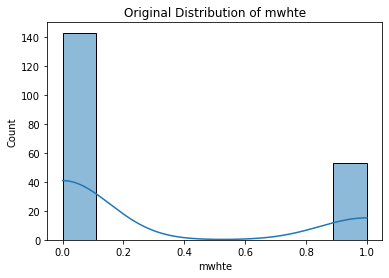

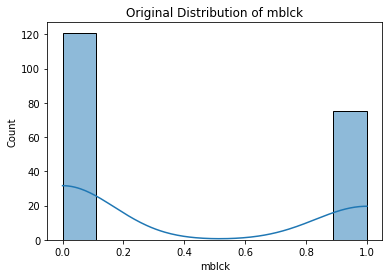

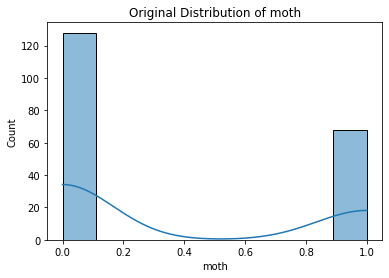

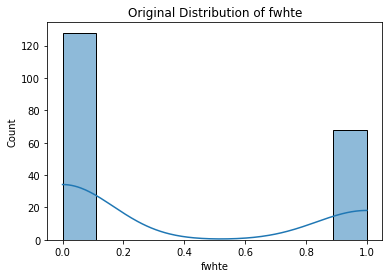

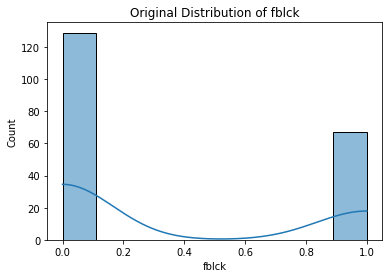

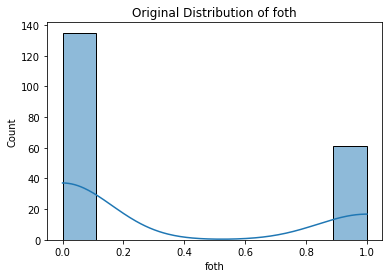

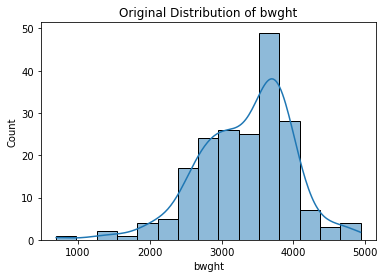

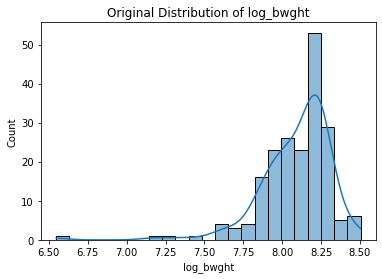

In [17]:
# checking skewness of the  X variables
for column in df:
    sns.histplot( data = df,
                   x   = column,
                   kde = True)

    plt.title(label   = f"Original Distribution of {column}" )
    plt.xlabel(xlabel = column) # avoiding using dataset labels
    plt.ylabel(ylabel = "Count")
    plt.show()

# encoding continuous data

 groupping variable depending on data type
CONTINUOUS
bwght - (y)
mage
fage
cigs
drink

INTERVAL/COUNT
npvis
meduc
monpre
feduc
omaps
fmaps


CATEGORICAL/OTHER
male
mwhte
mblck
moth
fwhte
fblck
foth

In [25]:
# listing continuous data
continuous_data = ['mage','fage','cigs','drink','bwght']
continuous_x = ['mage','fage','cigs','drink']

In [26]:
# log transforming skewed explanatory features
for column in df :
    
    if column in continuous_x : 
        df[f'log_{column}'] = np.log(df[{column}])
        
        
# check the result         
for col in df:
    print(col)
        

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght
log_bwght
log_mage
log_fage
log_cigs
log_drink


In [27]:
# add log columns
continuous_log_data =  continuous_data + ['log_mage','log_fage','log_drink','log_cigs']

In [28]:
# Making new x variable and logarithmic value
# multiple mage and fage
df['page'] = df['mage'] * df['fage']
df['log_page'] = np.log(df['page'])

new_variable = ['page','log_page']

# add new variables 
continuous_log_data = continuous_log_data + new_variable

# check the result
for col in df:
    print(col)


mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght
log_bwght
log_mage
log_fage
log_cigs
log_drink
page
log_page


In [29]:
# developing a correlation matrix based on continuous log data
birth_cor = df[continuous_log_data].corr(method = 'pearson')


# filtering the results to only show correlations with bwght
birth_cor.loc[ : ,'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght        1.00
log_fage    -0.38
fage        -0.40
log_mage    -0.42
log_cigs    -0.45
log_page    -0.45
mage        -0.46
page        -0.50
cigs        -0.57
log_drink   -0.66
drink       -0.74
Name: bwght, dtype: float64

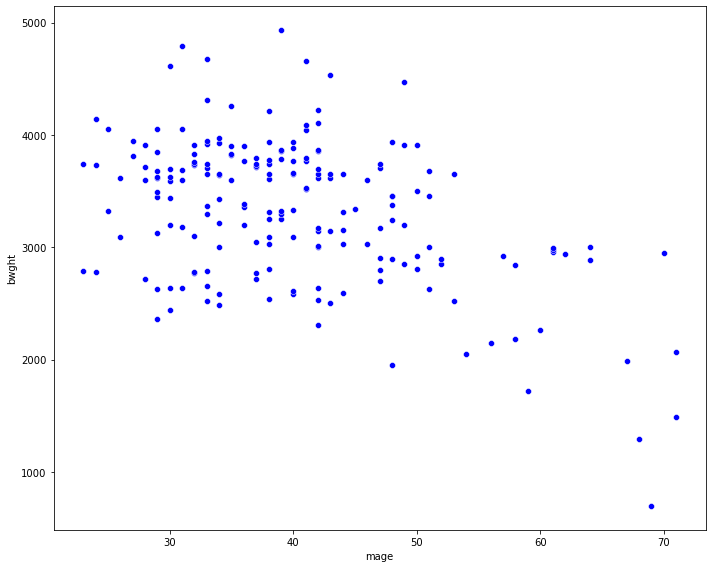

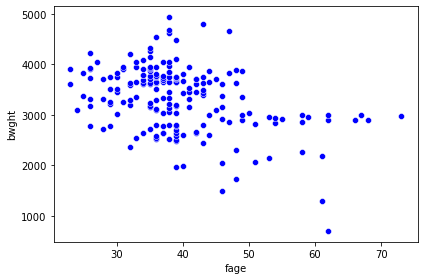

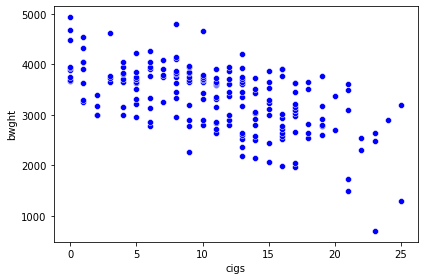

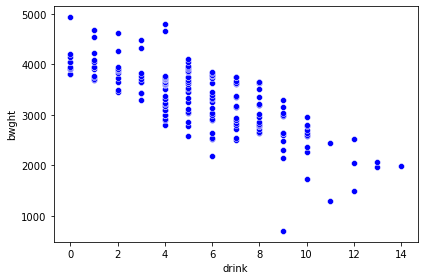

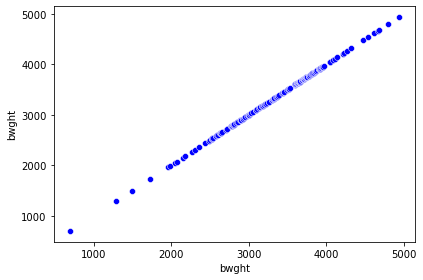

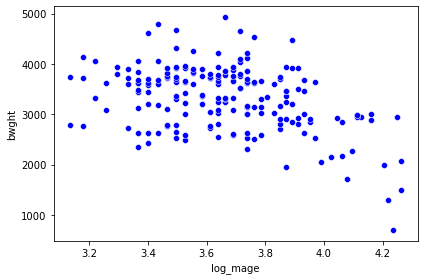

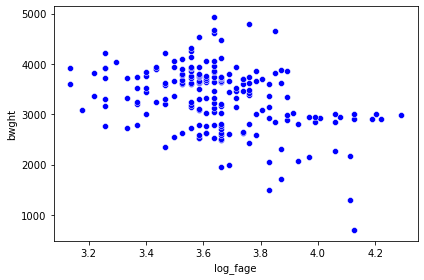

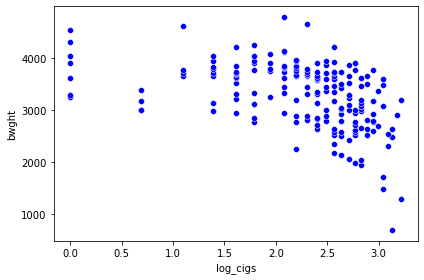

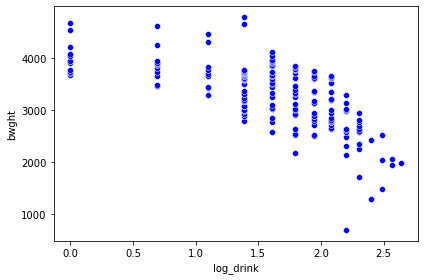

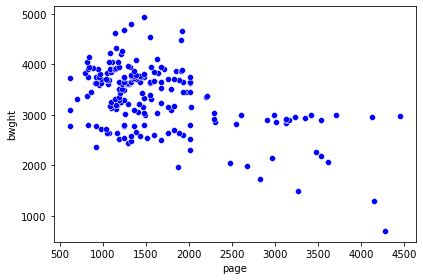

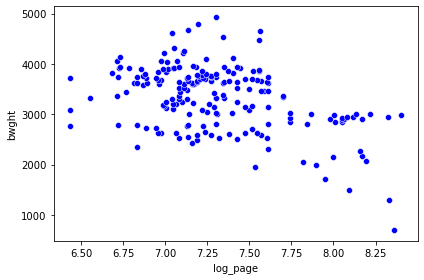

In [30]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# making scatterplot to check a patten 
for col in df:
    if col in continuous_log_data:
        sns.scatterplot(x = df[f'{col}'],
                        y = df['bwght'],
                        color = 'b')
        plt.xlabel(xlabel = f'{col}')
        plt.ylabel(ylabel = 'bwght')
        plt.tight_layout()
        plt.show()

# encoding categorical variable

In [31]:
#groupping categorical data
categorical_data = ['male','mwhte','mblck','moth','fwhte','fblck','foth' ]

# checking the value of each columns
for col in df:
    if col in categorical_data:
        print(f"""
{col}
------
{df[col].value_counts()}
""")





male
------
1    108
0     88
Name: male, dtype: int64


mwhte
------
0    143
1     53
Name: mwhte, dtype: int64


mblck
------
0    121
1     75
Name: mblck, dtype: int64


moth
------
0    128
1     68
Name: moth, dtype: int64


fwhte
------
0    128
1     68
Name: fwhte, dtype: int64


fblck
------
0    129
1     67
Name: fblck, dtype: int64


foth
------
0    135
1     61
Name: foth, dtype: int64



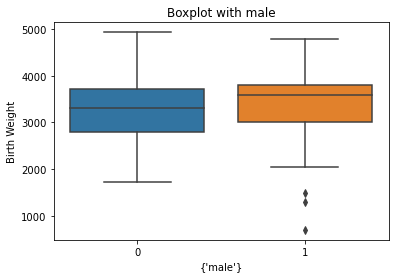

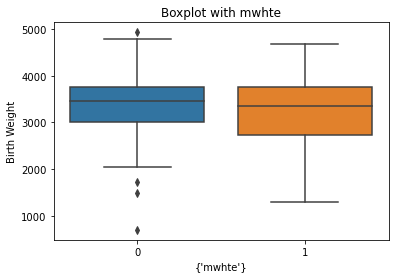

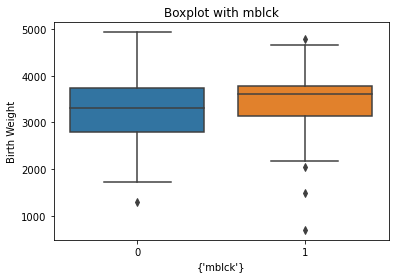

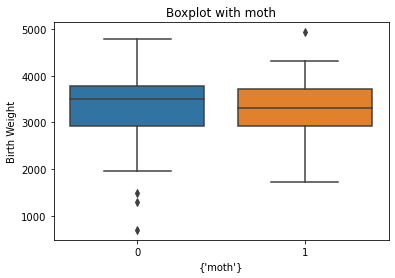

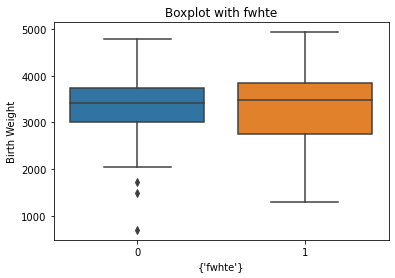

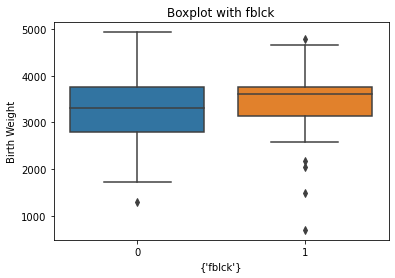

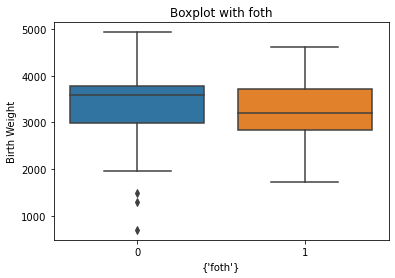

In [32]:
# developing a boxplot to analyze through average and range
for col in df:
    
    if col in categorical_data:
        sns.boxplot(x    =  f'{col}',
                    y    = 'bwght',
                    data = df)

        # titles and axis labels
        plt.title(label   = f'Boxplot with {col}')
        plt.xlabel(xlabel = {col})
        plt.ylabel(ylabel = 'Birth Weight')


        # displaying the plot
        plt.show()

# encoding interval variable

In [33]:
# groupping inretval variables
interval_data = [ 'npvis','meduc','monpre','feduc','omaps','fmaps']

# add new interval variables
df['pedu'] = df['meduc'] + df['feduc']


new_variable_int = ['pedu']

# append new interval variables to interval dataset
interval_data = interval_data + new_variable_int

In [34]:
# log transforming skewed interval features
for column in df :
    
    if column in interval_data : 
        df[f'log_{column}'] = np.log(df[{column}])

# check the result        
for col in df:
    print(col)    

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght
log_bwght
log_mage
log_fage
log_cigs
log_drink
page
log_page
pedu
log_meduc
log_monpre
log_npvis
log_feduc
log_omaps
log_fmaps
log_pedu


# OLS model

In [35]:
# creating a (Pearson) correlation matrix
df_corr = df.corr().round(2)


# printing (Pearson) correlations with bwght
print(df_corr.loc['bwght'].sort_values(ascending = False))

bwght         1.00
log_bwght     0.97
log_fmaps     0.26
log_omaps     0.26
omaps         0.25
fmaps         0.25
log_feduc     0.16
log_npvis     0.16
log_pedu      0.14
feduc         0.13
pedu          0.13
mblck         0.13
fblck         0.12
male          0.11
meduc         0.09
log_meduc     0.09
npvis         0.06
moth         -0.02
fwhte        -0.04
monpre       -0.05
log_monpre   -0.06
foth         -0.08
mwhte        -0.11
log_fage     -0.38
fage         -0.40
log_mage     -0.42
log_page     -0.45
log_cigs     -0.45
mage         -0.46
page         -0.50
cigs         -0.57
log_drink    -0.66
drink        -0.74
Name: bwght, dtype: float64


In [36]:
# creating a (Pearson) correlation matrix
df_corr = df.corr().round(2)


# printing (Pearson) correlations with log_bwght
print(df_corr.loc['log_bwght'].sort_values(ascending = False))


log_bwght     1.00
bwght         0.97
log_fmaps     0.33
log_omaps     0.32
fmaps         0.32
omaps         0.31
log_npvis     0.24
log_feduc     0.16
log_pedu      0.14
feduc         0.13
pedu          0.13
npvis         0.11
log_meduc     0.09
mblck         0.09
fblck         0.09
meduc         0.09
male          0.08
moth          0.00
foth         -0.04
fwhte        -0.04
log_monpre   -0.09
monpre       -0.09
mwhte        -0.11
log_fage     -0.39
fage         -0.41
log_cigs     -0.42
log_mage     -0.44
log_page     -0.48
mage         -0.50
page         -0.54
cigs         -0.55
log_drink    -0.59
drink        -0.70
Name: log_bwght, dtype: float64


In [37]:
# making a copy of df
x_variable = df.copy()


# dropping bwght from the explanatory variable set
# log_cig and log_drink remove to aviod error
x_variable = x_variable.drop(['bwght', 'log_bwght',
                              'log_cigs','log_drink'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in x_variable:
    print(f"{val} + ")

mage + 
meduc + 
monpre + 
npvis + 
fage + 
feduc + 
omaps + 
fmaps + 
cigs + 
drink + 
male + 
mwhte + 
mblck + 
moth + 
fwhte + 
fblck + 
foth + 
log_mage + 
log_fage + 
page + 
log_page + 
pedu + 
log_meduc + 
log_monpre + 
log_npvis + 
log_feduc + 
log_omaps + 
log_fmaps + 
log_pedu + 


In [38]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage + 
                                       fage + 
                                       cigs + 
                                       drink +
                                       log_page """,
                                       data = df)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     100.3
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.27e-51
Time:                        00:38:15   Log-Likelihood:                -1419.5
No. Observations:                 196   AIC:                             2851.
Df Residuals:                     190   BIC:                             2871.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3272.9946   2418.283     -1.353      0.1

In [39]:
# setting target and x_variable 
target = df.loc[ : , 'bwght']
x_OLS = df.loc[ : , ['mage' ,'fage','cigs','drink','log_page' ] ]


# Split into training and test set
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            x_variable,     # x-variables
            target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# OLS dataset
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(x_OLS, target, 
                                                    test_size = 0.25, 
                                                    random_state=219)

# checking the shapes of the datasets
print(f"""
Training Data
Full
-------------
X-side: {x_train_FULL.shape}
y-side: {y_train_FULL.shape}


Testing Data
------------
X-side: {x_test_FULL.shape}
y-side: {y_test_FULL.shape}



OLS
-------------
X-side: {x_train_OLS.shape}
y-side: {y_train_OLS.shape}


Testing Data
------------
X-side: {x_test_OLS.shape}
y-side: {y_test_OLS.shape}
""")


Training Data
Full
-------------
X-side: (147, 29)
y-side: (147,)


Testing Data
------------
X-side: (49, 29)
y-side: (49,)



OLS
-------------
X-side: (147, 5)
y-side: (147,)


Testing Data
------------
X-side: (49, 5)
y-side: (49,)



In [40]:
# Create the regressor: reg_all
lr = LinearRegression()

# Fit the regressor to the training data
lr_fit = lr.fit(x_train_OLS,y_train_OLS)

# Predict on the test data: y_pred
lr_pred = lr_fit.predict(x_test_OLS)

# print result
print("OLS train Score : ",lr.score(x_train_OLS, y_train_OLS).round(4))
print("OLS test Score  : ",lr.score(x_test_OLS, y_test_OLS).round(4))

ols_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
ols_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

print("OLS Gap of Score: ",(lr.score(x_train_OLS, y_train_OLS) 
                              - lr.score(x_test_OLS, y_test_OLS)).round(4))

ols_gap = abs(ols_train_score - ols_test_score).round(4)

OLS train Score :  0.7302
OLS test Score  :  0.6817
OLS Gap of Score:  0.0485


In [41]:
# zipping each feature name to its coefficient
lr_model_values = zip(x_OLS.columns,lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', -3367.87)
('mage', -51.29)
('fage', -40.41)
('cigs', -38.33)
('drink', -103.97)
('log_page', 1552.71)


# Lasso model

In [43]:
# Checking Lasso model by using all x variables

# INSTANTIATING a losso model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7483
Lasso Testing Score  : 0.6133
Lasso Train-Test Gap : 0.135


In [44]:
# zipping each feature name to its coefficient
lasso_model_values = zip(x_variable.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2501.4)
('mage', -7.34)
('meduc', 0.0)
('monpre', 0.0)
('npvis', -5.25)
('fage', 0.0)
('feduc', 0.0)
('omaps', 0.0)
('fmaps', 75.47)
('cigs', -36.82)
('drink', -98.05)
('male', 42.18)
('mwhte', 0.0)
('mblck', 0.0)
('moth', -78.78)
('fwhte', 0.0)
('fblck', 0.0)
('foth', -0.0)
('log_mage', -0.0)
('log_fage', 0.0)
('page', -0.11)
('log_page', 0.0)
('pedu', 0.0)
('log_meduc', 0.0)
('log_monpre', 22.6)
('log_npvis', 176.66)
('log_feduc', 34.54)
('log_omaps', 0.0)
('log_fmaps', 0.0)
('log_pedu', 340.14)


In [47]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2501.4)
('mage', -7.34)
('npvis', -5.25)
('fmaps', 75.47)
('cigs', -36.82)
('drink', -98.05)
('male', 42.18)
('moth', -78.78)
('page', -0.11)
('log_monpre', 22.6)
('log_npvis', 176.66)
('log_feduc', 34.54)
('log_pedu', 340.14)


In [48]:
# gruopping x variables for lasso model
# remove npvis because I chose to use log_npvis that has higher cofficient
x_lasoo = df.loc[ : , ['mage', 'meduc','fmaps','cigs','drink','male','moth','page',
                      'log_monpre','log_npvis','log_pedu']  ]


The way to choose x variables 
 1. groupping the variables
 age 
 ('mage', -7.34)
 ('page', -0.11)
 
 habit
('cigs', -36.82)
('drink', -98.05)

education
('log_feduc', 34.54)
('log_pedu', 340.14)

hospital
('npvis', -5.25)
('log_npvis', 176.66)
('log_monpre', 22.6)

baby
('male', 42.18)

test result
('fmaps', 75.47)

race
('moth', -78.78)

2. chose one variable to minimaize corrlationship between x variables
 (excpet habit)
 
 3. testing the result


In [49]:
# define final x variables for lasso model
x_lasoo = df.loc[ : , ['mage', 'cigs','drink','male','moth' ]  ]


In [50]:
# split lasso dataset
x_train_la, x_test_la, y_train_la, y_test_la = train_test_split(x_lasoo, target, 
                                                    test_size = 0.25, 
                                                    random_state=219)

# FITTING to the training data
lasso_fit_la = lasso_model.fit(x_train_la, y_train_la)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_la)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_la, y_train_la).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_la, y_test_la).round(4))


# saving scoring data for calculating gap
lasso_train_score = lasso_model.score(x_train_la, y_train_la).round(4) 
lasso_test_score  = lasso_model.score(x_test_la, y_test_la).round(4)   


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7135
Lasso Testing Score  : 0.6431
Lasso Train-Test Gap : 0.0704


# Bayesian Automatic Relevance Determination (ARD) model

In [51]:
# Testing ARD model by using all x variables

# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_model.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :', ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7502
Testing Score : 0.6398
ARD Train-Test Gap : 0.1104


In [52]:
# zipping each feature name to its coefficient
ard_model_values = zip(x_variable.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1055.76)
('mage', -0.00093)
('meduc', 0.00065)
('monpre', 0.00106)
('npvis', -0.00035)
('fage', 10.30332)
('feduc', 0.00105)
('omaps', 0.00031)
('fmaps', 54.73156)
('cigs', -39.03149)
('drink', -98.52633)
('male', 4.04776)
('mwhte', 0.00102)
('mblck', 5e-05)
('moth', -66.17083)
('fwhte', 0.00026)
('fblck', 0.00011)
('foth', -0.00053)
('log_mage', 0.00026)
('log_fage', 0.00113)
('page', -0.43967)
('log_page', 229.23806)
('pedu', 0.00199)
('log_meduc', 0.00043)
('log_monpre', 0.00114)
('log_npvis', 56.56795)
('log_feduc', 0.00111)
('log_omaps', 0.00049)
('log_fmaps', 0.00101)
('log_pedu', 390.23398)


In [54]:
# x variables for ARD model
x_ard = df.loc[ : ,['log_mage','meduc','monpre','log_npvis','log_feduc',
                     'log_omaps','log_fmaps','fage','cigs', 'drink','male',
                     'mwhte','mblck','moth','fwhte','fblck','foth','log_pedu']  ]


In [55]:
# Deciding final x variables for ARD model
x_ard = df.loc[ : , [ 'cigs','drink','male','moth','fage'  ]]


The way to choose x variables
 1) groupping x variables 
   - age
      'mage', -0.00093
      'fage', 10.30332
      'log_mage', 0.00026
      'log_fage', 0.00113
      'page', -0.43967
      'log_page', 229.23806
   
   - edu
      'meduc', 0.00065 
      'feduc', 0.00105
      'pedu', 0.00199
      'log_meduc', 0.00043
      'log_feduc', 0.00111
      'log_pedu', 390.23398

    - race 
     'mwhte', 0.00102
     'mblck', 5e-05
     'moth', -66.17083
     'fwhte', 0.00026
     'fblck', 0.00011
     'foth', -0.00053    

    - baby
     'male', 4.04776
     
     - test result
      'omaps', 0.00031
      'fmaps', 54.73156
      'log_omaps', 0.00049
      'log_fmaps', 0.00101

    - hospital
      'monpre', 0.00106
      'npvis', -0.00035
      'log_monpre', 0.00114
      'log_npvis', 56.56795

    - habit
       'cigs', -39.03149
       'drink', -98.52633
       
 2) Chose one variable from each group.(except habit group)
 
 3) Checked variables that has big difference between original and log values. 

In [56]:
# using ard x variable

# Split ard dataset
x_train_ard, x_test_ard, y_train_ard, y_test_ard = train_test_split(x_ard, target, 
                                                    test_size = 0.25, 
                                                    random_state=219)

# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_ard, y_train_ard)


# PREDICTING on new data
ard_pred = ard_model.predict(x_test_ard)


print('Training Score:', ard_model.score(x_train_ard, y_train_ard).round(4))
print('Testing Score :', ard_model.score(x_test_ard, y_test_ard).round(4))


# saving scoring data for future use
ard_train_score_ard = ard_model.score(x_train_ard, y_train_ard).round(4)
ard_test_score_ard  = ard_model.score(x_test_ard, y_test_ard).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score_ard - ard_test_score_ard).round(4))
ard_test_gap_ard = abs(ard_train_score_ard - ard_test_score_ard).round(4)

Training Score: 0.6756
Testing Score : 0.7278
ARD Train-Test Gap : 0.0522


#  k-Nearest Neighbors(KNN)

In [57]:
# testing KNN model by using full dataset

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(x_variable)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(x_variable)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.68,-2.91,-0.99,-2.27,-1.82,-4.98,-3.94,-6.10,-1.80,-1.80,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-2.16,-2.37,-1.32,-2.17,-3.79,-3.62,-1.43,-4.84,-8.31,-4.62,-7.06,-5.09
25%,-0.70,-0.94,-0.25,-0.38,-0.51,-0.72,-0.12,0.05,-0.81,-0.47,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-0.68,-0.46,-0.63,-0.64,-0.91,-0.91,-0.05,-0.26,-0.36,0.03,0.09,-0.82
50%,-0.11,0.04,-0.25,0.09,-0.14,0.06,0.51,0.05,0.01,-0.13,0.90,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,0.00,-0.04,-0.32,-0.19,0.06,0.12,-0.05,0.26,0.13,0.42,0.09,0.13
75%,0.57,1.03,0.49,0.09,0.41,0.83,0.51,0.05,0.71,0.62,0.90,1.64,1.27,1.37,1.37,1.39,1.49,0.68,0.53,0.32,0.57,1.02,1.01,0.76,0.26,0.56,0.42,0.09,0.95
max,3.02,1.52,4.19,5.54,3.76,1.22,1.15,1.59,2.31,2.87,0.90,1.64,1.27,1.37,1.37,1.39,1.49,2.46,2.98,3.71,2.72,1.50,1.41,2.71,3.31,0.75,0.78,1.37,1.32


In [58]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = x_variable.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(x_variable)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
mage             104.527593
meduc              4.140436
monpre             1.827025
npvis             17.840561
fage              80.277671
feduc              6.656680
omaps              2.472616
fmaps              0.422194
cigs              37.035714
drink              8.964077
male               0.247397
mwhte              0.197288
mblck              0.236230
moth               0.226572
fwhte              0.226572
fblck              0.224984
foth               0.214364
log_mage           0.059339
log_fage           0.046697
page          579993.320153
log_page           0.161626
pedu              17.302062
log_meduc          0.022405
log_monpre         0.252097
log_npvis          0.123468
log_feduc          0.097629
log_omaps          0.088968
log_fmaps          0.006757
log_pedu           0.026364
dtype: float64


Dataset AFTER Scaling
----------------------
mage          1.0
meduc         1.0
monpre        1.0
npvis         1.0
fage   

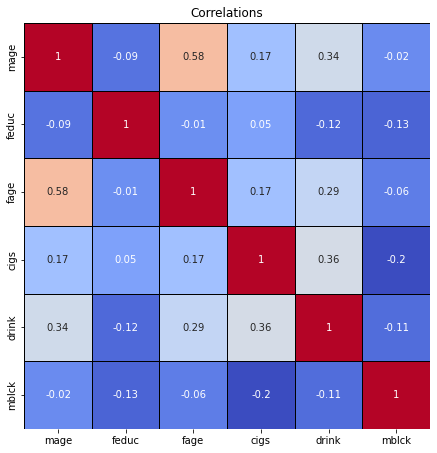

In [59]:
# subsetting the original dataset
df_knn = df.loc[ : , ['mage','feduc','fage','cigs','drink','mblck' ]]


# correlation matrix
df_corr = df_knn.corr().round(2)


# setting figure size and plot window
fig, ax = plt.subplots(figsize = (16, 16))
plt.subplot(1, 2, 1)


# heatmap of correlations
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False,
            linecolor  = 'black', 
            linewidths = 0.5)



# titling the plot and print
plt.title("Correlations")
plt.show()

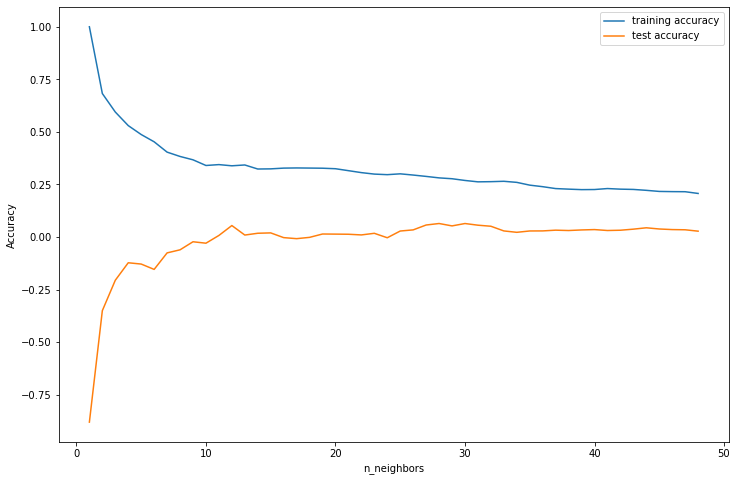

The optimal number of neighbors is 28


In [60]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 49)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_FULL, y_train_FULL)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_FULL, y_train_FULL))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_FULL, y_test_FULL))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [61]:
# Full data
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 28)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test_FULL)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train_FULL, y_train_FULL).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train_FULL, y_train_FULL).round(4)
knn_reg_score_test  = knn_reg.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.2811
KNN Testing Score : 0.064
KNN Train-Test Gap: 0.2171


In [62]:
# choose x variables fot KNN model 
x_knn = df.loc[ : , [ 'mage','feduc','fage','cigs','drink','mblck'  ]]

# Split KNN dataset
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x_knn, target, 
                                                    test_size = 0.25, 
                                                    random_state=219)

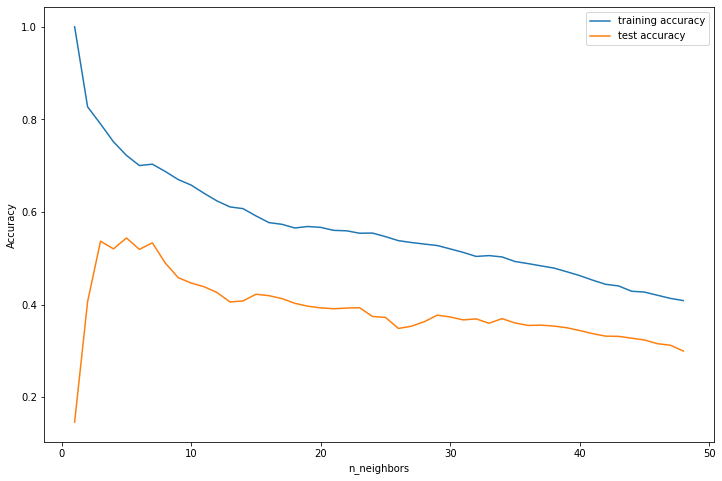

The optimal number of neighbors is 5


In [63]:
# creating lists for training set accuracy and test set accuracy
training_accuracy_knn = []
test_accuracy_knn     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings_knn = range(1, 49)


for n_neighbors in neighbors_settings_knn:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_knn, y_train_knn)
    
    # Recording the training set accuracy
    training_accuracy_knn.append(clf.score(x_train_knn, y_train_knn))
    
    # Recording the generalization accuracy
    test_accuracy_knn.append(clf.score(x_test_knn, y_test_knn))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy_knn, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy_knn, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# finding the optimal number of neighbors
opt_neighbors_knn = test_accuracy_knn.index(max(test_accuracy_knn)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors_knn}""")

In [64]:
# Using ard dataset
# INSTANTIATING a KNN model object
knn_reg_knn = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 5)


# FITTING to the training data
knn_fit_knn = knn_reg_knn.fit(x_train_knn, y_train_knn)


# PREDICTING on new data
knn_reg_pred_knn = knn_fit_knn.predict(x_test_knn)


# SCORING the results
print('KNN Training Score:', knn_reg_knn.score(x_train_knn, y_train_knn).round(4))
print('KNN Testing Score :',  knn_reg_knn.score(x_test_knn, y_test_knn).round(4))


# saving scoring data for future use
knn_reg_score_train_knn = knn_reg_knn.score(x_train_knn, y_train_knn).round(4)
knn_reg_score_test_knn  = knn_reg_knn.score(x_test_knn, y_test_knn).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train_knn - knn_reg_score_test_knn).round(4))
knn_reg_test_gap_knn = abs(knn_reg_score_train_knn - knn_reg_score_test_knn).round(4)

KNN Training Score: 0.7222
KNN Testing Score : 0.5438
KNN Train-Test Gap: 0.1784


In [66]:
# comparing results

print(f"""
Model      Train Score      Test Score        Gap
-----      -----------      ----------      ------------
OLS        {ols_train_score}           {ols_test_score}           {ols_gap}
Lasso      {lasso_train_score}           {lasso_test_score}           {lasso_gap}
ARD*       {ard_train_score_ard}           {ard_test_score_ard}           {ard_test_gap_ard}
KNN        {knn_reg_score_train_knn}           {knn_reg_score_test_knn}           {knn_reg_test_gap_knn}

* Final model
""")



Model      Train Score      Test Score        Gap
-----      -----------      ----------      ------------
OLS        0.7302           0.6817           0.0485
Lasso      0.7135           0.6431           0.0704
ARD*       0.6756           0.7278           0.0522
KNN        0.7222           0.5438           0.1784

* Final model

